## Collecting Data Process and Importing Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = []
with open("Yelp/yelp_academic_dataset_business.json", "rb") as f:
    reader = pd.read_json(f, orient="records", lines=True, 
                          chunksize=1000)
        
    for chunk in reader:
        reduced_chunk = chunk.drop(columns=['postal_code'])
                            
        df.append(reduced_chunk)
    
df = pd.concat(df, ignore_index=True)

In [3]:
df.head()

,business_id,name,address,city,state,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [4]:
len(df)

150346

In [5]:
# df.to_csv("yelp_academic_dataset_business.csv",index=False)

## Checking outliers in stars and review count

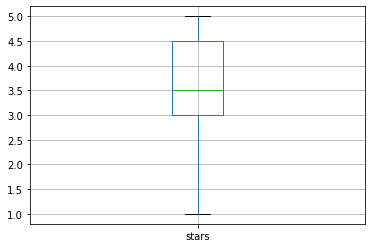

In [6]:
df.iloc[:,7:8].boxplot(figsize =(5,8))
plt.show()

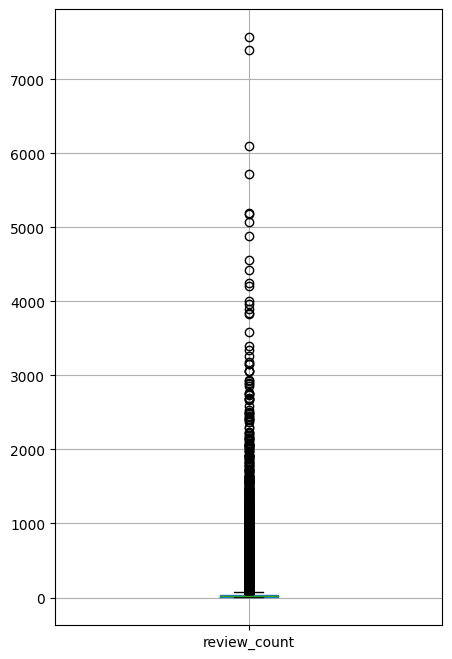

In [7]:
df.iloc[:,8:9].boxplot(figsize =(5,8))
plt.show()

In [8]:
df[['stars','review_count']].describe()

,stars,review_count
count,150346.000000,150346.000000
mean,3.596724,44.866561
std,0.974421,121.120136
min,1.000000,5.000000
25%,3.000000,8.000000
50%,3.500000,15.000000
75%,4.500000,37.000000
max,5.000000,7568.000000


## Checking state distribution (exploration)

In [9]:
df['state'].unique()

array(['CA', 'MO', 'AZ', 'PA', 'TN', 'FL', 'IN', 'LA', 'AB', 'NV', 'ID',
       'DE', 'IL', 'NJ', 'NC', 'CO', 'WA', 'HI', 'UT', 'TX', 'MT', 'MI',
       'SD', 'XMS', 'MA', 'VI', 'VT'], dtype=object)

In [10]:
count_state = df.groupby(['state'])[['name']].count().reset_index().sort_values(by = 'name',ascending = False)
count_state = count_state[count_state.name > 10]

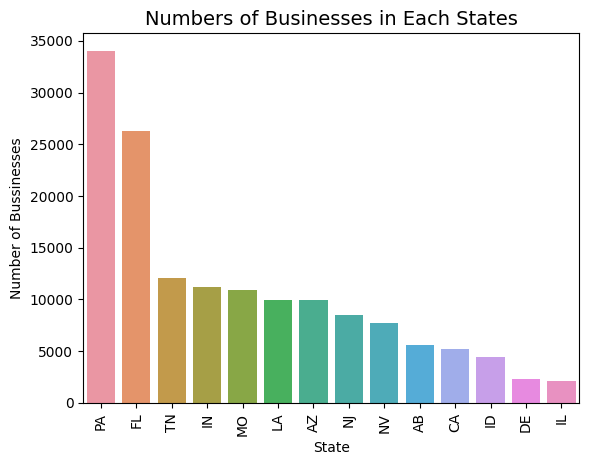

In [11]:
sns.barplot(data=count_state, x="state",y='name')
plt.xticks(rotation=90)
plt.xlabel('State', fontsize=10)
plt.ylabel('Number of Bussinesses', fontsize=10)
plt.title("Numbers of Businesses in Each States",fontsize=14)
plt.show()

## Real Map Visualization (exploration)

In [12]:
from mpl_toolkits.basemap import Basemap

In [13]:
df['latitude'].agg(['min', 'max'])

min    27.555127
max    53.679197
Name: latitude, dtype: float64

In [14]:
df['longitude'].agg(['min', 'max'])

min   -120.095137
max    -73.200457
Name: longitude, dtype: float64

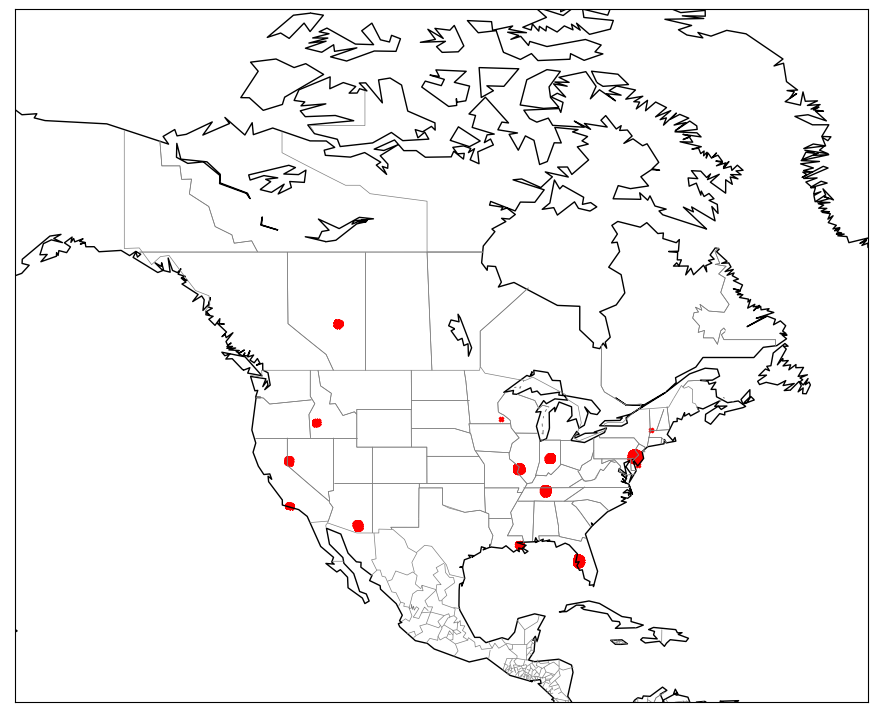

In [15]:
# setting the size of the map
fig = plt.figure(figsize=(12,9))

# creating the map - setting latitude and longitude
m = Basemap(projection = 'mill', llcrnrlat = 10.555127, urcrnrlat = 77.679197, llcrnrlon = -155.095137,\
            urcrnrlon = -45.200457, resolution = 'c')
m.drawcoastlines()
m.drawcountries(color='gray')
m.drawstates(color='gray')

# creating variable for latitude and longitude to list
lat = df['latitude'].tolist()
lon = df['longitude'].tolist()

# plotting the map
m.scatter(lon, lat, latlon = True, s = 10, c = 'red', marker = 'X', alpha = 1)

plt.show()

## Make a visualization on how review effects businesses (exploration)

In [16]:
df_review = df
df_review['stars'] = df['stars'].apply(lambda x: int(math.floor(x)))

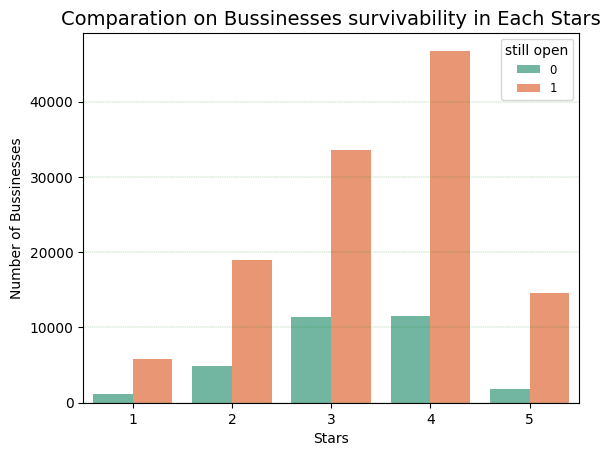

In [17]:
my_palette = sns.color_palette("Set2")
sns.countplot(data=df_review, x="stars", hue="is_open",palette=my_palette)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.3,axis = 'y', alpha=0.5)
plt.xlabel('Stars', fontsize=10)
plt.ylabel('Number of Bussinesses', fontsize=10)
plt.title("Comparation on Bussinesses survivability in Each Stars",fontsize=14)
plt.legend(title='still open', fontsize='small')
plt.show()

### Remove businesses with 1 stars and perfect 5 stars because there are not any business that totally perfect or totally awful

In [18]:
df = df[(df.stars > 1.0) & (df.stars < 5.0)]
len(df)

127121

## Most categories in Yelp (exploration)

In [19]:
def total_categories(df):
    categories_list = set()
    for index,row in df.iterrows():
        temp = row['categories'].replace(" ","").split(',')
        for i in temp:
            categories_list.add(i)
    return(list(categories_list))

In [20]:
def convert_dict(lst):
    res_dct = {lst[i]: 0 for i in range(len(lst))}
    return(res_dct)

In [21]:
def trend_categories(dct,df):
    for index,row in df.iterrows():
        temp = row['categories'].replace(" ","").split(',')
        for i in temp:
            dct[i]+=1
    return dct

In [22]:
df.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      10041
categories         45
hours           19338
dtype: int64

In [23]:
df = df.dropna(subset=['categories'])

In [24]:
from collections import Counter

In [25]:
categories = total_categories(df)
categories_dict=convert_dict(categories)
categories_count = trend_categories(categories_dict,df)
categories_count = dict(Counter(categories_count).most_common(10))
categories_count

{'Restaurants': 48987,
 'Food': 24818,
 'Shopping': 20418,
 'Nightlife': 11760,
 'Beauty&Spas': 11683,
 'Bars': 10681,
 'HomeServices': 10266,
 'Health&Medical': 9043,
 'Automotive': 8671,
 'LocalServices': 8452}

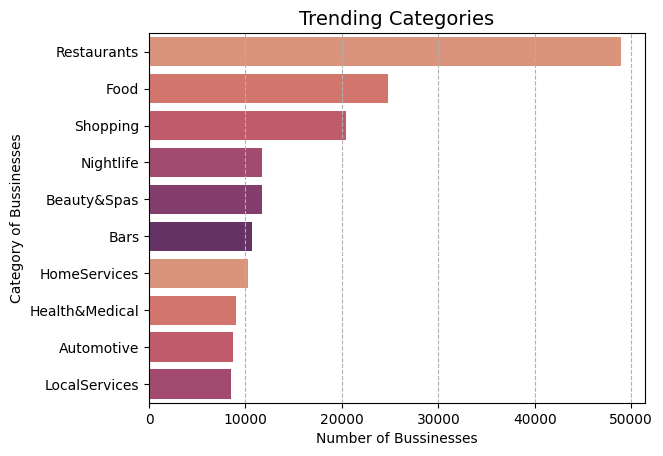

In [26]:
colors = sns.color_palette("flare")
keys = list(categories_count.keys())
# keys
vals = list(categories_count.values())
# vals
sns.barplot(x=vals, y=keys, orient = 'h',palette = colors)
plt.grid(axis='x', linestyle='--')
# plt.xticks(rotation=90)
plt.xlabel('Number of Bussinesses', fontsize=10)
plt.ylabel('Category of Bussinesses', fontsize=10)
plt.title("Trending Categories", fontsize=14)
plt.show()

## Filtering Dataframe for all restaurants (Preprocessing)

In [27]:
df_restaurant = df[df['categories'].str.contains("Restaurants",na=False)]

In [28]:
df_restaurant = df_restaurant[df_restaurant.is_open==1]

In [29]:
df_restaurant = df_restaurant.drop(columns=['is_open'])

In [30]:
df_restaurant.head()

,business_id,name,address,city,state,latitude,longitude,stars,review_count,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,39.955505,-75.155564,4,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,36.269593,-87.058943,2,6,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,27.955269,-82.456320,4,10,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,39.637133,-86.127217,2,28,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,39.953949,-75.143226,4,245,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."


### Remove businesses with too many or not getting enough reviews because it can make a bias to the data
### (Preprocessing)

In [31]:
def remove_outliers_iqr(df, column_name):
    # Calculate IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter dataframe
    clean_df = df[(df[column_name] > lower_bound) & (df[column_name] < upper_bound)]
    
    return clean_df

In [32]:
df_restaurant = remove_outliers_iqr(df_restaurant,'review_count')
len(df_restaurant)

29295

In [33]:
df_restaurant.describe()

,latitude,longitude,stars,review_count
count,29295.000000,29295.000000,29295.000000,29295.000000
mean,37.303270,-87.641557,3.262161,60.502270
std,6.196896,13.745940,0.743480,60.498192
min,27.564457,-120.001095,2.000000,5.000000
25%,32.228159,-90.234031,3.000000,15.000000
50%,39.599293,-82.831938,3.000000,37.000000
75%,39.978718,-75.333039,4.000000,86.000000
max,53.679197,-74.680250,4.000000,264.000000


In [34]:
df_restaurant.dtypes

business_id      object
name             object
address          object
city             object
state            object
latitude        float64
longitude       float64
stars             int64
review_count      int64
attributes       object
categories       object
hours            object
dtype: object

In [35]:
df_restaurant.isnull().sum()

business_id        0
name               0
address            0
city               0
state              0
latitude           0
longitude          0
stars              0
review_count       0
attributes       346
categories         0
hours           3087
dtype: int64

In [36]:
df_restaurant.dropna(inplace=True)

In [70]:
df_restaurant = df_restaurant[(df_restaurant.stars > 1.0) & (df_restaurant.stars < 5.0)]

## The trending attribute used (Exploration)

In [37]:
def attribute_listed(df):
    attribute_list = set()
    for index,row in df.iterrows():
        temp = dict(row['attributes'])
        for key, value in temp.items():
            attribute_list.add(key)
    return(list(attribute_list))

In [38]:
def trend_attribute(dct,df):
    for index,row in df.iterrows():
        temp = dict(row['attributes'])
        for key, value in temp.items():
            dct[key]+=1
    return dct

In [39]:
attri_list = attribute_listed(df_restaurant)
attri_dict = convert_dict(attri_list)
attri_trend = trend_attribute(attri_dict,df_restaurant)
attri_trend =  dict(Counter(attri_trend).most_common(18))
attri_trend

{'RestaurantsTakeOut': 24888,
 'RestaurantsDelivery': 24458,
 'BusinessParking': 23092,
 'BusinessAcceptsCreditCards': 22544,
 'RestaurantsPriceRange2': 21753,
 'OutdoorSeating': 21687,
 'HasTV': 21309,
 'RestaurantsReservations': 21233,
 'Ambience': 21059,
 'RestaurantsGoodForGroups': 19880,
 'Alcohol': 19699,
 'WiFi': 19677,
 'GoodForKids': 19516,
 'BikeParking': 19428,
 'Caters': 18306,
 'RestaurantsAttire': 18257,
 'NoiseLevel': 16863,
 'GoodForMeal': 16585}

In [40]:
len(df_restaurant. index) 

26008

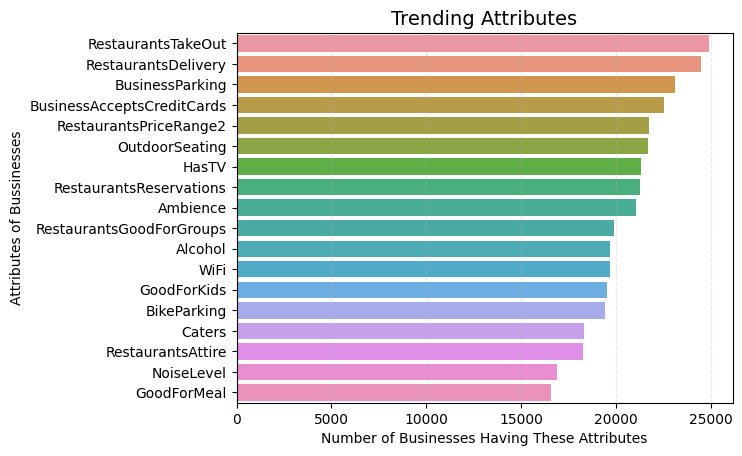

In [41]:
attri_keys = list(attri_trend.keys())
# keys
attri_vals = list(attri_trend.values())
# vals
sns.barplot(x=attri_vals, y=attri_keys , orient = 'h')
plt.grid(axis='x', linestyle='--', alpha = 0.3)
plt.xlabel('Number of Businesses Having These Attributes', fontsize=10)
plt.ylabel('Attributes of Bussinesses', fontsize=10)
plt.title("Trending Attributes", fontsize=14)
plt.show()

## Make a new df with attribute (Preprocessing)

In [42]:
def df_with_attribute(df,lst):
    for index, row in df.iterrows():
    # calculate the value of a new column based on the values of columns A and B
        attri = dict(row['attributes'])
    
    # assign the new value to a new column in the same row
        for i in lst:
            try:
                df.at[index, i] = attri[i]
            except:
                df.at[index, i] = 'False_null'
    return df

In [43]:
df_attri = df_with_attribute(df_restaurant,attri_keys)
df_attri.rename(columns={'RestaurantsPriceRange2': 'RestaurantsPriceRange'}, inplace=True)
df_attri

,business_id,name,address,city,state,latitude,longitude,stars,review_count,attributes,...,Ambience,RestaurantsGoodForGroups,Alcohol,WiFi,GoodForKids,BikeParking,Caters,RestaurantsAttire,NoiseLevel,GoodForMeal
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,39.955505,-75.155564,4,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",...,False_null,False_null,u'none',u'free',False_null,True,True,False_null,False_null,False_null
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,36.269593,-87.058943,2,6,"{'BusinessParking': 'None', 'BusinessAcceptsCr...",...,None,True,u'none',u'no',True,False,False,u'casual',False_null,False_null
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,27.955269,-82.456320,4,10,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...",...,"{'touristy': False, 'hipster': False, 'romanti...",False_null,'none',False_null,False_null,False_null,False_null,False_null,False_null,"{'dessert': False, 'latenight': False, 'lunch'..."
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,39.637133,-86.127217,2,28,"{'RestaurantsReservations': 'False', 'Restaura...",...,"{'touristy': None, 'hipster': None, 'romantic'...",True,'none',u'no',True,False,False_null,'casual',False_null,"{'dessert': False, 'latenight': False, 'lunch'..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,39.953949,-75.143226,4,245,"{'RestaurantsReservations': 'True', 'Restauran...",...,"{'touristy': False, 'hipster': False, 'romanti...",True,'full_bar','free',False,False_null,False_null,'casual',u'average',"{'dessert': True, 'latenight': None, 'lunch': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150313,sf_oQ62L8UEnOOLf00nNGA,Pizza Hut,5028 Old Hickory,Hermitage,TN,36.193201,-86.614748,3,6,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...",...,"{'touristy': False, 'hipster': False, 'romanti...",False,False_null,False_null,False,False_null,False_null,False_null,False_null,False_null
150325,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,39.925656,-75.310344,3,11,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",...,False_null,False_null,False_null,False_null,False_null,True,True,False_null,False_null,False_null
150327,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,43.615401,-116.284689,4,33,"{'WiFi': ''free'', 'RestaurantsGoodForGroups':...",...,"{'romantic': False, 'intimate': False, 'classy...",True,u'none','free',True,True,False,'casual',u'loud',"{'dessert': False, 'latenight': False, 'lunch'..."
150336,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,39.935982,-75.158665,4,35,"{'WheelchairAccessible': 'False', 'Restaurants...",...,"{'touristy': None, 'hipster': False, 'romantic...",True,u'none',u'free',True,True,True,'casual',False_null,"{'dessert': True, 'latenight': None, 'lunch': ..."


In [44]:
df_attri.drop(['Ambience','BusinessParking'], axis=1,inplace = True)

In [45]:
len(df_attri)

26008

In [46]:
df_attri = df_attri.drop(df_attri.loc[df_attri.iloc[:, 12:27].apply(lambda x: x.str.contains('False_null')).any(axis=1)].index)

## Making labels to identify the high-rated(1) or low-rated(0) in restaurant quality based on the review (Preprocessing)

In [47]:
categories = [ '1', '0']
star_ranges = [(3, 5), (0, 3)]

In [48]:
def label_business(row):
    for i, (start, end) in enumerate(star_ranges):
        if row['stars'] >= start and row['stars'] < end:
            return categories[i]

In [49]:
df_attri['label'] = df_attri.apply(label_business, axis=1)

In [74]:
df_attri.tail()

,business_id,name,address,city,state,latitude,longitude,stars,review_count,attributes,...,RestaurantsGoodForGroups,Alcohol,WiFi,GoodForKids,BikeParking,Caters,RestaurantsAttire,NoiseLevel,GoodForMeal,label
150260,N8fK2E6YNyo04DbVNvgIQw,Sage Mediterranean,150 Bridge St,Phoenixville,PA,40.134042,-75.514528,4,118,"{'WiFi': ''no'', 'RestaurantsAttire': ''casual...",...,1,0,0,1,1,0,1,0,"{'dessert': False, 'latenight': False, 'lunch'...",1
150275,IeSD0nMKRFYUTnR5nZH1CQ,HighWire Lounge,14 S Arizona Ave,Tucson,AZ,32.221828,-110.967969,3,111,"{'BusinessParking': '{'garage': False, 'street...",...,1,1,0,0,1,0,1,1,"{'dessert': False, 'latenight': False, 'lunch'...",1
150276,Rn3DtOiuJtc3whFySWXs5Q,Japanese Village,2940 Calgary Trail NW,Edmonton,AB,53.463917,-113.494702,3,35,"{'RestaurantsAttire': 'u'casual'', 'NoiseLevel...",...,1,1,1,1,0,1,1,3,"{'dessert': False, 'latenight': None, 'lunch':...",1
150306,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,Philadelphia,PA,40.032483,-75.214430,3,55,"{'NoiseLevel': 'u'average'', 'RestaurantsTakeO...",...,0,0,0,1,1,1,1,1,"{'dessert': False, 'latenight': False, 'lunch'...",1
150327,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,43.615401,-116.284689,4,33,"{'WiFi': ''free'', 'RestaurantsGoodForGroups':...",...,1,0,1,1,1,0,1,2,"{'dessert': False, 'latenight': False, 'lunch'...",1


In [51]:
df_attri.iloc[:,12:27]

,RestaurantsTakeOut,RestaurantsDelivery,BusinessAcceptsCreditCards,RestaurantsPriceRange,OutdoorSeating,HasTV,RestaurantsReservations,RestaurantsGoodForGroups,Alcohol,WiFi,GoodForKids,BikeParking,Caters,RestaurantsAttire,NoiseLevel
19,True,None,True,1,None,True,False,False,u'none',u'no',True,True,True,u'casual',u'quiet'
33,True,True,True,1,False,True,False,True,u'none',u'no',True,True,True,u'casual',u'average'
41,True,False,True,2,True,True,True,True,u'full_bar','free',True,True,True,u'casual',u'average'
61,True,False,True,2,True,True,False,True,'full_bar','free',True,False,False,'casual','average'
79,True,True,True,2,False,True,True,True,u'full_bar',u'free',False,True,True,u'casual',u'average'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150260,True,True,True,2,False,True,True,True,'none','no',True,True,False,'casual',u'quiet'
150275,False,False,True,2,True,True,False,True,'full_bar','no',False,True,False,'casual',u'average'
150276,True,True,True,3,False,True,True,True,u'full_bar',u'free',True,False,True,u'casual',u'very_loud'
150306,True,True,True,2,False,True,False,False,u'none','no',True,True,True,u'casual',u'average'


In [52]:
df_attri.RestaurantsPriceRange.unique()

array(['1', '2', '3', '4', 'None'], dtype=object)

In [53]:
for i in range (12,27):
    print(df_attri.columns[i])
    print(df_attri[df_attri.columns[i]].unique())

RestaurantsTakeOut
['True' 'None' 'False']
RestaurantsDelivery
['None' 'True' 'False']
BusinessAcceptsCreditCards
['True' 'False' 'None']
RestaurantsPriceRange
['1' '2' '3' '4' 'None']
OutdoorSeating
['None' 'False' 'True']
HasTV
['True' 'False' 'None']
RestaurantsReservations
['False' 'True' 'None']
RestaurantsGoodForGroups
['False' 'True']
Alcohol
["u'none'" "u'full_bar'" "'full_bar'" "'none'" "u'beer_and_wine'"
 "'beer_and_wine'" 'None']
WiFi
["u'no'" "'free'" "u'free'" "'no'" "u'paid'" "'paid'" 'None']
GoodForKids
['True' 'False']
BikeParking
['True' 'False' 'None']
Caters
['True' 'False' 'None']
RestaurantsAttire
["u'casual'" "'casual'" "'dressy'" "u'dressy'" "u'formal'" "'formal'"
 'None']
NoiseLevel
["u'quiet'" "u'average'" "'average'" "u'loud'" "'quiet'" "u'very_loud'"
 "'loud'" 'None' "'very_loud'"]


## Cleaning and preprocess the attribute column (Preprocessing)

In [54]:
df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].replace(to_replace='.*alse.*', value=0, regex=True)
df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].replace(to_replace='.*one.*', value=0, regex=True)
df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].replace(to_replace='.*no.*', value=0, regex=True)
df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].replace(to_replace='.*rue.*', value=1, regex=True)
df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].replace(to_replace='.*free.*', value=1, regex=True)
df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].replace(to_replace='.*paid.*', value=1, regex=True)
df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].replace(to_replace='.*bar.*', value=1, regex=True)
df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].replace(to_replace='.*wine.*', value=1, regex=True)
df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].replace(to_replace='.*dress.*', value=1, regex=True)
df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].replace(to_replace='.*formal.*', value=1, regex=True)
df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].replace(to_replace='.*casual.*', value=1, regex=True)
df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].replace(to_replace='.*quiet.*', value=0, regex=True)
df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].replace(to_replace='.*avera.*', value=1, regex=True)
df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].replace(to_replace='.*very.*', value=3, regex=True)
df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].replace(to_replace='.*loud.*', value=2, regex=True)

C:\Users\russe\AppData\Local\Temp/ipykernel_3904/2109051205.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].replace(to_replace='.*rue.*', value=1, regex=True)
C:\Users\russe\AppData\Local\Temp/ipykernel_3904/2109051205.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].replace(to_replace='.*paid.*', value=1, regex=True)
C:\Users\russe\AppData\Local\Temp/ipykernel_3904/2109051205.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] =

In [72]:
for i in range (12,27):
    print(df_attri.columns[i])
    print(df_attri[df_attri.columns[i]].unique())

RestaurantsTakeOut
[1 0]
RestaurantsDelivery
[0 1]
BusinessAcceptsCreditCards
[1 0]
RestaurantsPriceRange
[0 1 2 3]
OutdoorSeating
[0 1]
HasTV
[1 0]
RestaurantsReservations
[0 1]
RestaurantsGoodForGroups
[0 1]
Alcohol
[0 1]
WiFi
[0 1]
GoodForKids
[1 0]
BikeParking
[1 0]
Caters
[1 0]
RestaurantsAttire
[1 0]
NoiseLevel
[0 1 2 3]


In [56]:
condition = df_attri['RestaurantsPriceRange'] == 0 
df_attri = df_attri[~condition] 

In [57]:
len(df_attri)

11853

In [58]:
df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].astype('int32')

C:\Users\russe\AppData\Local\Temp/ipykernel_3904/2544368447.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_attri.iloc[:,12:27] = df_attri.iloc[:,12:27].astype('int32')


In [59]:
df_attri['RestaurantsPriceRange'] = df_attri['RestaurantsPriceRange'] - 1

In [60]:
df_attri.dtypes

business_id                    object
name                           object
address                        object
city                           object
state                          object
latitude                      float64
longitude                     float64
stars                           int64
review_count                    int64
attributes                     object
categories                     object
hours                          object
RestaurantsTakeOut              int32
RestaurantsDelivery             int32
BusinessAcceptsCreditCards      int32
RestaurantsPriceRange           int32
OutdoorSeating                  int32
HasTV                           int32
RestaurantsReservations         int32
RestaurantsGoodForGroups        int32
Alcohol                         int32
WiFi                            int32
GoodForKids                     int32
BikeParking                     int32
Caters                          int32
RestaurantsAttire               int32
NoiseLevel  

In [61]:
df_attri.to_csv("restaurants_model.csv",index=False)

## Machine Learning Classification process

## Split test train (ML)

In [62]:
from sklearn.model_selection import train_test_split

In [75]:
X = df_attri.iloc[:,12:27]
X.head()

,RestaurantsTakeOut,RestaurantsDelivery,BusinessAcceptsCreditCards,RestaurantsPriceRange,OutdoorSeating,HasTV,RestaurantsReservations,RestaurantsGoodForGroups,Alcohol,WiFi,GoodForKids,BikeParking,Caters,RestaurantsAttire,NoiseLevel
19,1,0,1,0,0,1,0,0,0,0,1,1,1,1,0
33,1,1,1,0,0,1,0,1,0,0,1,1,1,1,1
41,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
61,1,0,1,1,1,1,0,1,1,1,1,0,0,1,1
79,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1


In [76]:
y = df_attri.label
y.head()

19    1
33    1
41    1
61    1
79    1
Name: label, dtype: object

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Build a function to get best model and hyper parameters  (ML)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [67]:
def best_hyperparams(X_train, y_train, X_test, y_test):
    # Define parameter grids for each model
    lr_params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
    dt_params = {'max_depth': [1, 5, 10], 'min_samples_split': [2, 5, 10]}
    rf_params = {'n_estimators': [100, 200, 500], 'max_depth': [10, 20, None]}
    svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    # Create a dictionary with the parameter grids for each model
    param_grids = {'Logistic Regression': lr_params,
                   'Decision Tree': dt_params,
                   'Random Forest': rf_params,
                   'Support Vector Machines': svm_params}
    best_params = {}
    for model_name, params in param_grids.items():
        if model_name == 'Logistic Regression':
            clf = GridSearchCV(estimator=LogisticRegression(), param_grid=params, cv=5)
        elif model_name == 'Decision Tree':
            clf = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=5)
        elif model_name == 'Random Forest':
            clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=5)
        elif model_name == 'Support Vector Machines':
            clf = GridSearchCV(estimator=SVC(), param_grid=params, cv=5)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        best_params[model_name] = [clf.best_params_, score]
    # Convert the results to a pandas DataFrame
    results_df = pd.DataFrame.from_dict(best_params, orient='index', columns=['Best Parameters', 'Accuracy Score'])
    results_df.index.name = 'Model'
    return results_df

In [68]:
results_df = best_hyperparams(X_train, y_train, X_test, y_test)
print(results_df)

C:\Users\russe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\russe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\russe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\russe\AppData\Local\Programs\Python\

                                                    Best Parameters  \
Model                                                                 
Logistic Regression                     {'C': 0.1, 'penalty': 'l2'}   
Decision Tree            {'max_depth': 10, 'min_samples_split': 10}   
Random Forest                {'max_depth': 10, 'n_estimators': 200}   
Support Vector Machines                   {'C': 1, 'kernel': 'rbf'}   

                         Accuracy Score  
Model                                    
Logistic Regression            0.856018  
Decision Tree                  0.850112  
Random Forest                  0.859955  
Support Vector Machines        0.857987  
